# Práctica 3: Aprendizaje automático supervisado

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre un conjuntos de datos y aprender a interpretar los resultados obtenidos.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: K__

__Nombres de los estudiantes: Lucía Alonso Mozo y Javier Amado Lázaro__

# Apartado 2: Clasificación

## 1) Carga del conjunto de datos

---



En este notebook trabajaremos con un conjunto de datos con diferentes características médicas de personas. El objetivo es establecer un diagnóstico sobre si tiene una enfermedad cardiovacular o no.

Crea un dataframe a partir del fichero `heart_failure.csv` que se proporciona junto con la práctica. Antes de nada, elimina las filas con valores nulos.



In [1]:
## Si no lo tienes instalado, puedes hacerlo desde el notebook
import sys

!{sys.executable} -m pip install google

# Asumismos instalado wdsparql
%load_ext autoreload
%load_ext wdsparql
%autoreload 2

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [2]:
RANDOM_STATE=333

In [3]:
import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IA2/p2/2324/housing.csv')
df = pd.read_csv('./heart_failure.csv')
df = df.dropna().reset_index(drop = True) #eliminamos las filas con valores nulos.

# Haciendo una copia de una selección
mi_copia2 = df.iloc[0:,].copy()

df



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.


In [4]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [5]:
df["HeartDisease"].value_counts()/len(df)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

Para comprobar si las clases a predecir están equilibradas, hemos calculado la proporción de cada clase en el conjunto de datos (918 datos). En este caso, tenemos dos clases: personas sin problemas cardíacos (410) y personas con problemas cardíacos (508).

La proporción de personas sin problemas cardíacos es: 0.446623, mientras que la proporción de personas con problemas cardíacos es: 0.553377. Como podemos observar, estas proporciones son bastante cercanas, ambas alrededor del 0,5, y por tanto, podemos concluir que las clases están relativamente equilibradas en este conjunto de datos.

Ahora, en cuanto a cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo:
* Impacto en el entrenamiento del modelo:

Si las clases están desequilibradas, el modelo puede volverse sesgado hacia la clase dominante, es decir, la clase que tiene más ejemplos en el conjunto de datos. Esto llevará a que el modelo tenga problemas en identificar patrones en la clase que no domina, pues el modelo presenta menos ejemplos de ello, y por tanto menos ejemplos de los que poder aprender. 

* Impacto en la evaluación del modelo:

Si las clases están desequilibradas, las métricas de evaluación como la precisión pueden ser engañosas. Es por eso que en estos casos, es importante utilizar métricas de evaluación que tengan en cuenta el desequilibrio de clases, como la precisión equilibrada, la sensibilidad o la especificidad. Con clases equilibradas, las métricas de evaluación son más confiables y proporcionan una mejor comprensión del rendimiento del modelo en todas las clases.

In [6]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [7]:
df_hd = df[df['HeartDisease'] == 1]
df_hd['Sex'].value_counts()

M    458
F     50
Name: Sex, dtype: int64

No obstante, en relación al género, se destaca que la mayoría de los participantes son hombres, con un total de 725 en comparación con 193 mujeres. Sin embargo, de aquellos diagnosticados positivamente con problemas cardíacos, solamente 50 son mujeres. Por consiguiente, se justifica la mayor representación de hombres en el estudio, dado que son estos quienes muestran una mayor incidencia de problemas cardiacos.

In [8]:
df = df[df['Cholesterol'] > 0]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Es necesario mencionar que estamos excluyendo a las personas cuyo colesterol aparece como cero en los registros. Desde un punto de vista científico, es imposible tener el colesterol en cero y seguir con vida, lo que podría indicar datos erróneos o de personas fallecidas. Además, teníamos 172 casos con esta situación, lo cual es demasiado alto para ser simplemente errores aleatorios, lo que podría afectar la validez del estudio. Ahora el estudio pasa a tener 746 participaciones válidas.

Tras quitarlos, los datos se mantienen equilibrados, y de hecho, más que antes.

In [9]:
df["HeartDisease"].value_counts()/len(df)

0    0.522788
1    0.477212
Name: HeartDisease, dtype: float64

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).


### Distribuciones de cada variable:

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,746.0,52.882038,9.505888,28.0,46.00,54.0,59.0,77.0
RestingBP,746.0,133.022788,17.282750,92.0,120.00,130.0,140.0,200.0
Cholesterol,746.0,244.635389,59.153524,85.0,207.25,237.0,275.0,603.0
FastingBS,746.0,0.167560,0.373726,0.0,0.00,0.0,0.0,1.0
MaxHR,746.0,140.226542,24.524107,69.0,122.00,140.0,160.0,202.0
Oldpeak,746.0,0.901609,1.072861,-0.1,0.00,0.5,1.5,6.2
HeartDisease,746.0,0.477212,0.499816,0.0,0.00,0.0,1.0,1.0


La columna "count" refleja un total de 746 observaciones.

Examinemos las características de las filas:

- "Age": Corresponde a la edad de los participantes en el estudio. Se observa que no se incluyen personas extremadamente jóvenes ni de edad avanzada, con un rango comprendido entre los 28 y 77 años, y una media de 52 años. Se presume que se excluyeron adolescentes y niños debido a su limitada contribución informativa, dado que el aumento de la edad tiende a correlacionarse con problemas cardíacos.

- "RestingBP": Esta variable registra la presión arterial en estado de reposo, cuyos valores elevados suelen indicar posibles problemas cardiovasculares. Se evidencia un mínimo de 92 y un máximo de 200, con una media de 133.

- "Cholesterol": Indica los niveles de colesterol en la sangre, donde lecturas elevadas pueden ser indicativas de obstrucciones arteriales. Se observa un mínimo de 85 y un máximo de 603. Es relevante señalar que se excluyeron del estudio a 172 personas cuyos niveles de colesterol se registraron como cero, además de considerar que, según la literatura científica, niveles de colesterol superiores a 600 mg/dl son improbablemente altos, dado que a partir de 240 mg/dl se considera elevado. Sin embargo, la eliminación de estos datos no es factible, ya que no se dispone de información sobre cuál es el límite válido para estos valores.

- "FastingBP": Indica si los niveles de azúcar en sangre en ayunas son anormalmente altos, lo cual es un indicador de diabetes, una condición relacionada con enfermedades cardíacas. Estos datos se presentan de manera binaria, con 0 para niveles bajos y 1 para niveles altos. La tendencia predominante es hacia niveles bajos, con una media cercana a 0.16.

- "MaxHR": Representa la frecuencia cardíaca máxima durante las pruebas, lo cual sugiere la eficacia del bombeo cardíaco. La media es de 140, con un rango entre 69 y 202.

- "Oldpeak" y "STSlope": Estas métricas provienen de las pruebas de electrocardiograma (ECG) y proporcionan información sobre el flujo sanguíneo cardíaco, especialmente durante el ejercicio físico. "Oldpeak" varía entre -0.1 y 6.2, con una media de 0.9. Por otro lado, "STSlope" se presenta como una variable categórica que puede clasificarse como "down", "flat" o "up".

- "HeartDisease" : Son valores 0 o 1, y como ya habíamos estudiado anteriormente, la media es de 0.47 aproximadamente, valor que nos viene bien para tener un estudio equilibrado.

### Correlación entre las variables:

In [11]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.259865,0.058758,0.241338,-0.382112,0.286006,0.298617
RestingBP,0.259865,1.000000,0.095939,0.173765,-0.125774,0.198575,0.173242
Cholesterol,0.058758,0.095939,1.000000,0.054012,-0.019856,0.058488,0.103866
FastingBS,0.241338,0.173765,0.054012,1.000000,-0.102710,0.055568,0.160594
MaxHR,-0.382112,-0.125774,-0.019856,-0.102710,1.000000,-0.259533,-0.377212
Oldpeak,0.286006,0.198575,0.058488,0.055568,-0.259533,1.000000,0.495696
HeartDisease,0.298617,0.173242,0.103866,0.160594,-0.377212,0.495696,1.000000


Estudiemos a continuación la correlación entre las variables (estudiamos solo una parte ya que la matriz es simétrica):

* Age y RestingBP: Existe una correlación positiva moderada (0.259865), lo que sugiere que a medida que la edad aumenta, la presión arterial en reposo tiende a incrementarse.

* Age y Cholesterol: La correlación entre la edad y los niveles de colesterol es muy baja (0.058758), lo que indica una relación débil entre ambas variables. Esto indica que la edad por sí sola no es un predictor fuerte de los niveles de colesterol en sangre.

* Age y FastingBS: Hay una correlación positiva moderada (0.241338), lo que sugiere que la edad y los niveles de azúcar en sangre en ayunas tienden a estar relacionados de manera moderada.

* Age y MaxHR: Existe una correlación negativa moderada (-0.382112), lo que indica que a medida que la edad aumenta, la frecuencia cardíaca máxima durante las pruebas tiende a disminuir.

* Age y Oldpeak: La correlación entre la edad y la métrica "Oldpeak" es positiva y moderada (0.286006), lo que sugiere que a medida que la edad aumenta, la magnitud de la depresión del segmento ST durante el ejercicio físico también tiende a aumentar.

* Age y HeartDisease: Hay una correlación positiva moderada (0.298617), lo que sugiere que a medida que la edad aumenta, la probabilidad de enfermedad cardíaca también tiende a aumentar.

* RestingBP y Cholesterol: La correlación es baja (0.095939), lo que sugiere una débil relación entre la presión arterial en reposo y los niveles de colesterol en sangre.

* RestingBP y FastingBS: Hay una correlación baja (0.173765), lo que sugiere una relación débil entre la presión arterial en reposo y los niveles de azúcar en sangre en ayunas.

* RestingBP y MaxHR: La correlación es negativa baja (-0.125774), lo que indica una relación débil y negativa entre la presión arterial en reposo y la frecuencia cardíaca máxima durante las pruebas.

* RestingBP y Oldpeak: Existe una correlación positiva moderada (0.198575), lo que sugiere que a medida que la presión arterial en reposo aumenta, la magnitud de la depresión del segmento ST durante el ejercicio físico también tiende a aumentar.

* RestingBP y HeartDisease: Hay una correlación positiva moderada (0.173242), lo que sugiere que a medida que la presión arterial en reposo aumenta, la probabilidad de enfermedad cardíaca también tiende a aumentar.

* Cholesterol y FastingBS: La correlación es baja (0.054012), lo que sugiere una débil relación entre los niveles de colesterol y los niveles de azúcar en sangre en ayunas.

* Cholesterol y MaxHR: La correlación es baja (-0.019856), lo que indica una relación débil entre los niveles de colesterol y la frecuencia cardíaca máxima durante las pruebas.

* Cholesterol y Oldpeak: La correlación es baja (0.058488), lo que sugiere una relación débil entre los niveles de colesterol y la magnitud de la depresión del segmento ST durante el ejercicio físico.

* Cholesterol y HeartDisease: Hay una correlación baja (0.103866), lo que sugiere una débil relación entre los niveles de colesterol y la probabilidad de enfermedad cardíaca.

* FastingBS y MaxHR: La correlación es baja (-0.102710), lo que sugiere una relación débil y negativa entre los niveles de azúcar en sangre en ayunas y la frecuencia cardíaca máxima durante las pruebas.

* FastingBS y Oldpeak: La correlación es baja (0.055568), lo que sugiere una relación débil entre los niveles de azúcar en sangre en ayunas y la magnitud de la depresión del segmento ST durante el ejercicio físico.

* FastingBS y HeartDisease: Hay una correlación baja (0.160594), lo que sugiere una débil relación entre los niveles de azúcar en sangre en ayunas y la probabilidad de enfermedad cardíaca.

* MaxHR y Oldpeak: La correlación es negativa moderada (-0.259533), lo que sugiere que a medida que la frecuencia cardíaca máxima durante las pruebas disminuye, la magnitud de la depresión del segmento ST durante el ejercicio físico tiende a aumentar.

* MaxHR y HeartDisease: La correlación es negativa moderada (-0.377212), lo que sugiere que a medida que la frecuencia cardíaca máxima durante las pruebas disminuye, la probabilidad de enfermedad cardíaca tiende a aumentar.

* Oldpeak y HeartDisease: Hay una correlación positiva fuerte (0.495696), lo que indica una relación significativa entre la magnitud de la depresión del segmento ST durante el ejercicio físico y la probabilidad de enfermedad cardíaca.

Podemos observar que ninguna variable tiene una correlación tanto positiva como negativa demasiado alta, y por tanto, podemos considerar todas como independientes entre sí, lo que nos lleva a no tener que eliminar ninguna columna por redundancia.


### Grafos de dispersión

Pintaremos de color azul las personas que no tengan problemas cardiacos, y de rojo los que sí.

In [12]:
# Podemos usar el color como tercera dimensión para ver cómo se distribuyen los individuos de cada una de las clases
dic_colors = { 0: 'blue', 1: 'red'}
colors = df['HeartDisease'].map(dic_colors)

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='RestingBP', ylabel='Age'>,
        <Axes: xlabel='Cholesterol', ylabel='Age'>,
        <Axes: xlabel='FastingBS', ylabel='Age'>,
        <Axes: xlabel='MaxHR', ylabel='Age'>,
        <Axes: xlabel='Oldpeak', ylabel='Age'>,
        <Axes: xlabel='HeartDisease', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='RestingBP'>,
        <Axes: xlabel='RestingBP', ylabel='RestingBP'>,
        <Axes: xlabel='Cholesterol', ylabel='RestingBP'>,
        <Axes: xlabel='FastingBS', ylabel='RestingBP'>,
        <Axes: xlabel='MaxHR', ylabel='RestingBP'>,
        <Axes: xlabel='Oldpeak', ylabel='RestingBP'>,
        <Axes: xlabel='HeartDisease', ylabel='RestingBP'>],
       [<Axes: xlabel='Age', ylabel='Cholesterol'>,
        <Axes: xlabel='RestingBP', ylabel='Cholesterol'>,
        <Axes: xlabel='Cholesterol', ylabel='Cholesterol'>,
        <Axes: xlabel='FastingBS', ylabel='Cholesterol'>,
        <Axes: xlabel='MaxHR', ylabel='Cho

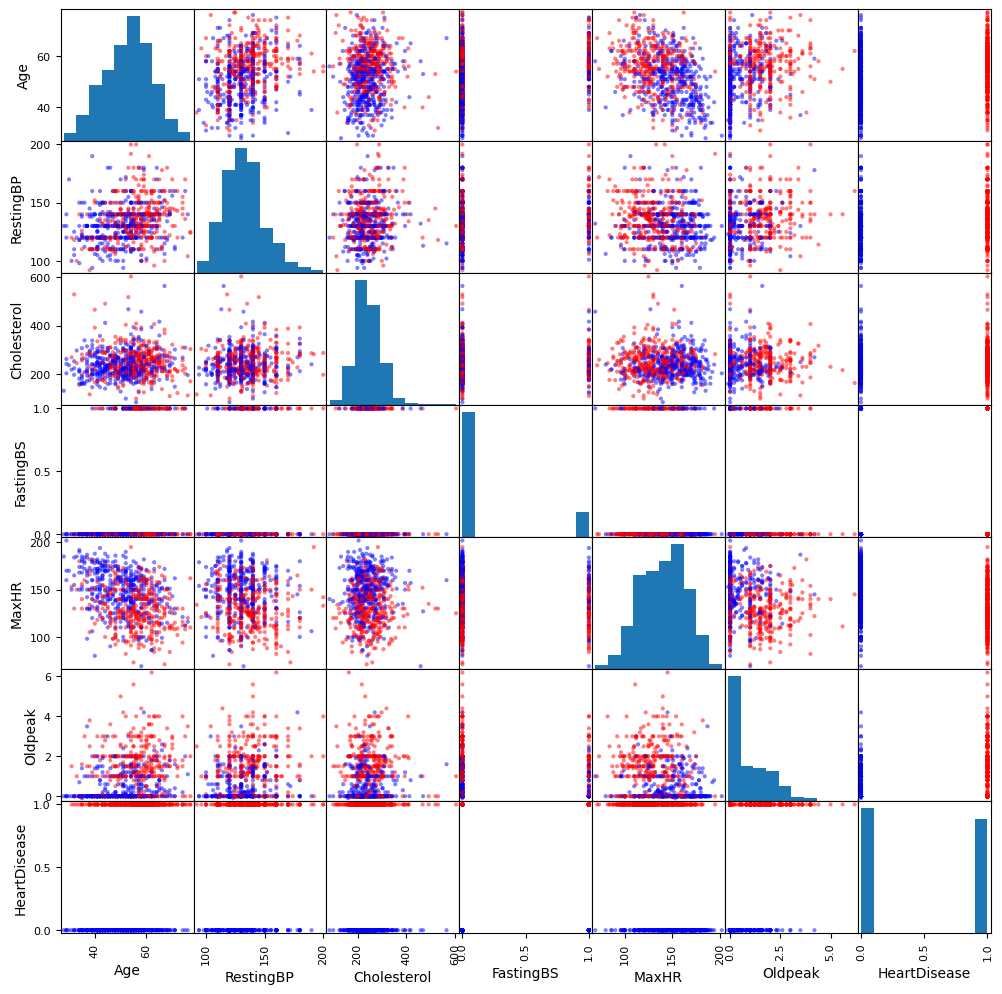

In [13]:
from pandas.plotting import scatter_matrix
%matplotlib inline
scatter_matrix(df, figsize = (12, 12), diagonal = 'hist', color=colors)

Podemos apreciar en los gráficos de la diagonal, que se distribuyen en su mayoría como normales. Es por tanto que a posteriori, podremos considerar estandarizar los datos como una normal.

### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

In [14]:
df.describe(include=['object']).transpose()

,count,unique,top,freq
Sex,746,2,M,564
ChestPainType,746,4,ASY,370
RestingECG,746,3,Normal,445
ExerciseAngina,746,2,N,459
ST_Slope,746,3,Flat,354



Esta tabla proporciona información estadística sobre diferentes características en el conjunto de datos:

En todas hay 746 observaciones.

* Sex:
Se registran 2 valores únicos, lo que indica la presencia de dos categorías distintas de sexo.
El valor más común es "M" (masculino), que aparece 564 veces, lo que sugiere una mayoría significativa de hombres en el estudio.


* ChestPainType: 
Hay 4 categorías únicas de tipo de dolor de pecho.
La categoría más frecuente es "ASY" (asintomático), que aparece 370 veces, indicando que la mayoría de los participantes no experimentan dolor de pecho durante el estudio.


* RestingECG:
Existen 3 categorías únicas de resultados de electrocardiograma en reposo.
La categoría más común es "Normal", que se presenta en 445 observaciones, sugiriendo que la mayoría de los participantes tienen resultados de ECG normales en reposo.


* ExerciseAngina:
Hay 2 categorías únicas que indican la presencia o ausencia de angina inducida por el ejercicio.
La categoría más frecuente es "N" (no), que aparece en 459 observaciones, lo que sugiere que la mayoría de los participantes no experimentan angina inducida por el ejercicio.


* ST_Slope:
Se identifican 3 categorías únicas que describen la inclinación del segmento ST.
La categoría más prevalente es "Flat" (plano), presente en 354 observaciones, indicando que una proporción significativa de los participantes presenta un segmento ST plano durante las pruebas.

A continuación presentamos un histograma con todas las variables categóricas.

<Axes: >

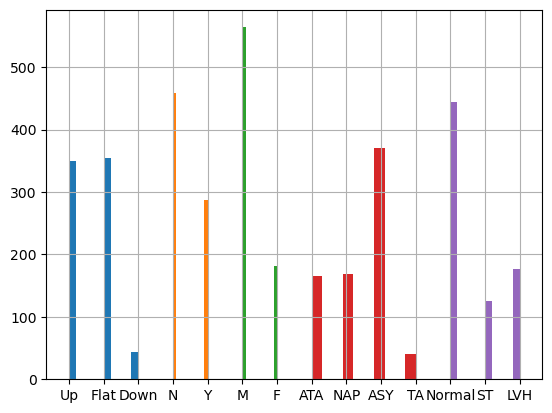

In [15]:
df['ST_Slope'].hist()
df['ExerciseAngina'].hist()
df['Sex'].hist()
df['ChestPainType'].hist()
df['RestingECG'].hist()

## 3) Separa los datos en entrenamiento y test

Ajusta cada modelo de aprendizaje con los datos de entrenamiento y da una evaluación final con los datos de test.


Para la separación de datos en conjuntos de entrenamiento y prueba, es necesario que todas las variables estén en formato numérico. Dado que no existe un valor numérico exacto para la conversión de variables categóricas a numéricas, se procurará asignar valores de manera que reflejen una lógica coherente, donde las categorías opuestas se encuentren lo más distantes posible.

In [16]:
df.keys()

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Inicialmente consideramos convertir variables categóricas en numéricas basándonos en la percepción de distancia entre sus valores, pero encontramos dificultades al no tener claridad en algunas categorías. Decidimos utilizar `pd.get_dummies()` para evitar sesgos y representar cada categoría como columnas binarias separadas, lo que garantizó una codificación precisa y sin suposiciones sobre la relación entre las categorías. Esto nos permitió abordar la complejidad de las variables categóricas de manera efectiva y obtener una representación lo más precisa posible en nuestro análisis.

In [17]:
df_number = pd.get_dummies(df, columns=['Sex', 'ChestPainType','RestingECG','ExerciseAngina', 'ST_Slope' ])
df_number

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [18]:
df_number_no_hd = df_number.drop(['HeartDisease'], axis = 1)
df_number_no_hd #Denominamos así a nuestro datagrama que no posee la variable de HeartDisease

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


Hasta este punto hemos transformado nuestros datos categóricos en númericos y es así que podremos aplicar los algoritmos correspondientes.

A continuación, dividiremos el conjunto de datos en 70% entrenamiento y 30% test. La elección de estos números podemos justificarlas por varias razones como: permite evaluar la capacidad del modelo para hacer predicciones precisas en datos no vistos; ayuda a detectar si el modelo está ajustándose demasiado a los datos de entrenamiento; proporciona una estimación confiable del rendimiento del modelo en la práctica; evita la evaluación optimista del modelo al usar los mismos datos para entrenamiento y prueba; y utiliza una cantidad mínima de datos para obtener un modelo efectivo.

In [19]:
from sklearn.model_selection import train_test_split

# Partimos el conjunto de datos en entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(df_number_no_hd.values, df_number['HeartDisease'], test_size=0.30, random_state=RANDOM_STATE)

In [20]:
#df_train = pd.DataFrame(X_train, columns = list(df_number_no_hd.columns))
#aux_train = pd.DataFrame(y_train, columns = ['HeartDisease']).reset_index(drop=True)
#df_train_hd = df_train.iloc[0:,].copy()
#df_train_hd['HeartDisease'] = aux_train['HeartDisease']
#df_train_hd

In [21]:
#df_test = pd.DataFrame(X_test, columns = list(df_number_no_hd.columns))
#aux_test = pd.DataFrame(y_test, columns = ['HeartDisease']).reset_index(drop=True)
#df_test_hd = df_test.iloc[0:,].copy()
#df_test_hd['HeartDisease'] = aux_test['HeartDisease']
#df_test_hd

## 4) Árboles de decisión

Aplica árboles de decisión para resolver el problema.


### Estimación del acierto

A continuación, presentamos una estimación formal del rendimiento en precisión tanto en el conjunto de entrenamiento como en el de prueba después de entrenar nuestro modelo utilizando un árbol de decisión con los parámetros predeterminados. Es fundamental señalar que hemos realizado el entrenamiento con el 70% de los datos previamente separados, y hemos evaluado el rendimiento con el 30% restante correspondiente al conjunto de prueba.

In [22]:
# Creamos y entrenamos el árbol de decisión con los parámetros por defecto
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf.fit(X_train, y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
train_accuracy, test_accuracy

(1.0, 0.7946428571428571)

Podemos observar como el árbol clasifica perfectamente el conjunto de entrenamiento pero no lo hace tan bien con el conjunto de test. Parece que nuestro modelo ha sobreaprendido. Si queremos tener unos valores más confiables del error podemos utilizar validación cruzada. 

In [23]:
# validación cruzada
from sklearn.model_selection import cross_validate
import numpy as np

# Creamos y entrenamos el árbol de decisión con los parámetros por defecto
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)

# Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
scores = cross_validate(clf, X_train, y_train, scoring='accuracy',
                        cv=10, return_train_score=True)

# scores es un diccionario con datos sobre tiempos y exactitud (accuracy)
train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
train_accuracy, test_accuracy

(1.0, 0.8143686502177067)

La validación cruzada es preferible porque nos da una imagen más sólida del desempeño del modelo al probarlo en diferentes conjuntos de datos. En este método, tomamos el 70% del conjunto de entrenamiento y lo dividimos en 10 partes, utilizando cada una como conjunto de prueba en turnos. Esto nos permite evaluar cómo se comporta el modelo en diversas situaciones de validación. Aunque vemos que la precisión en el conjunto de prueba ha mejorado, todavía enfrentamos el problema de sobreajuste: el modelo se ajusta demasiado bien a los datos de entrenamiento pero no generaliza correctamente en los datos de prueba.

### 4.1) Preprocesamiento de los datos

Decide si es conveniente preprocesar los datos de alguna manera. Justifica tu respuesta.

Como ya se ha visto anteriormente, hemos pasado las variables categóricas a numéricas. Para el árbol consideramos que no haría falta ningun otro procesamiento de los datos pues no depende de distancias ni de nada, y tan solo construye el árbol preguntando por variables. 

Dibujamos el arbol de decisión con los parámetros por defecto.

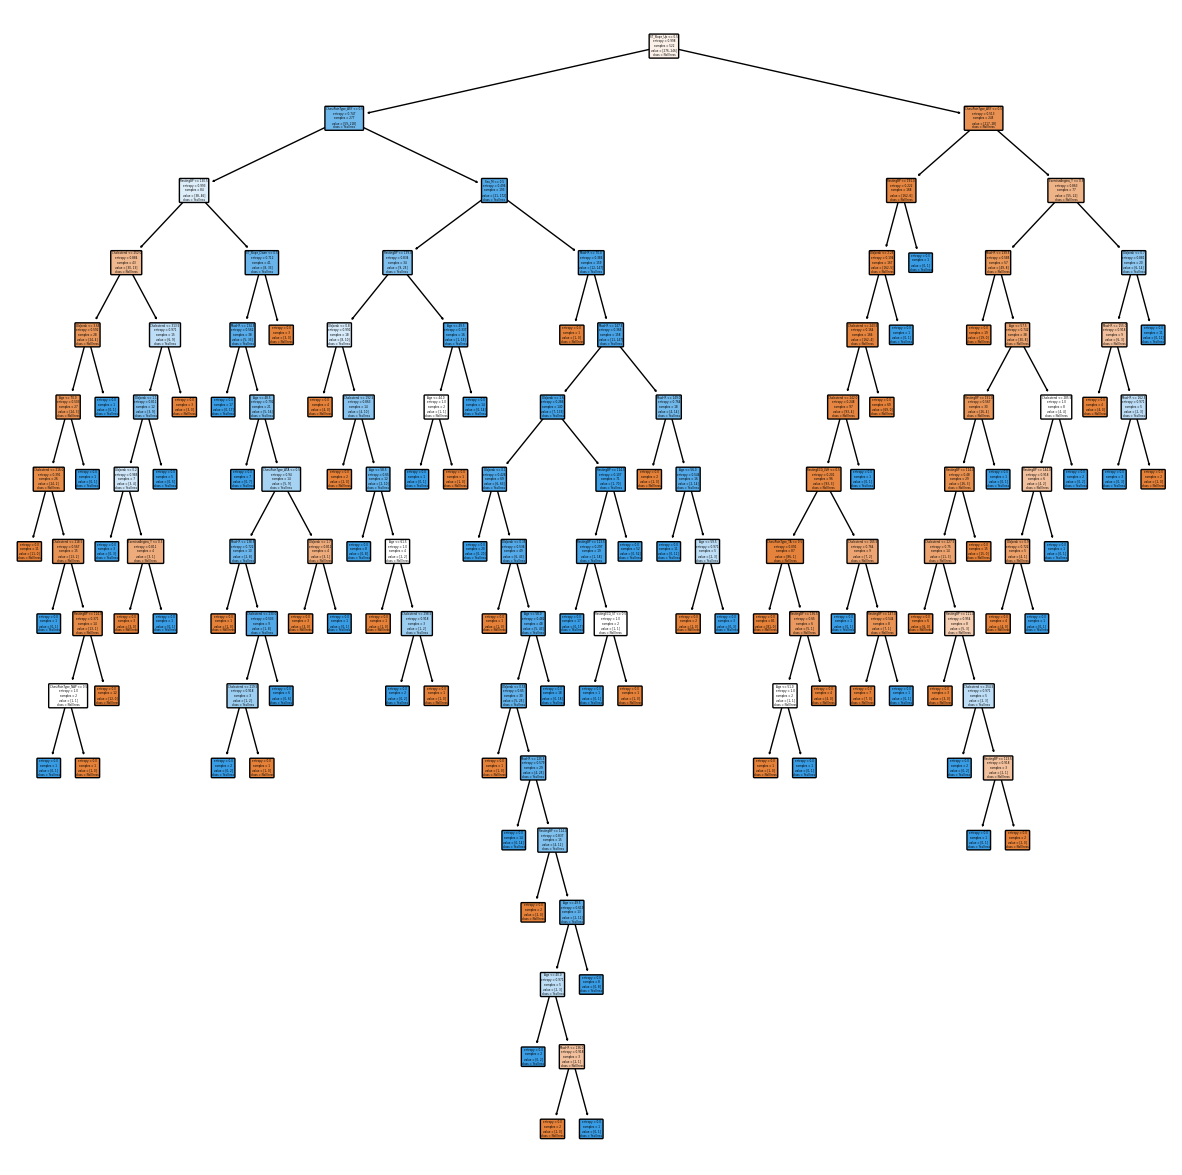

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Creamos un árbol de decisión con la configuración por defecto y lo entrenamos
clf = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion = "entropy")
clf = clf.fit(X_train, y_train)
# Pintamos el árbol
plt.figure(figsize=(15,15))
feature_names_columns = ['Age', 'RestingBP',	'Cholesterol',	'FastingBS',	'MaxHR',	'Oldpeak'	,'Sex_F',	'Sex_M',	'ChestPainType_ASY',	'ChestPainType_ATA',	'ChestPainType_NAP',	'ChestPainType_TA',	'RestingECG_LVH',	'RestingECG_Normal',	'RestingECG_ST',	'ExerciseAngina_N',	'ExerciseAngina_Y',	'ST_Slope_Down',	'ST_Slope_Flat',	'ST_Slope_Up']
class_names_columns = ['NoIllness', 'YesIllnes']
plot_tree(clf, filled=True, feature_names=feature_names_columns, class_names=class_names_columns, rounded=True)
plt.show()

El árbol presentado anteriormente tiene una profundidad de 16, lo cual lo hace excesivamente largo y complicado, dificultando su comprensión. Esto va en contra de la naturaleza del árbol de decisión, que se destaca por su simplicidad y facilidad de interpretación. Por tanto, la opción más sensata sería construir un árbol más corto, reduciendo su profundidad, pero manteniendo la capacidad de clasificación óptima. Abordaremos este aspecto en la próxima sección.

### 4.2) Optimizando el número mínimo de ejemplos para dividir un nodo

A continuación, realizaremos una iteración desde 1 hasta 20, considerando estas como las posibles profundidades del árbol de decisión. Utilizaremos validación cruzada para evaluar el rendimiento de cada árbol en cuanto a la precisión en el conjunto de entrenamiento (train_accuracy) y en el conjunto de prueba (test_accuracy). Guardaremos los resultados de train_accuracy y test_accuracy correspondientes a cada árbol con su respectiva profundidad.

In [25]:
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 20)
for md in max_depths:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(clf, X_train, y_train, scoring='accuracy', cv=10, return_train_score=True)

    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

train_accuracy, test_accuracy

([0.8333330308941613,
  0.8333330308941613,
  0.8812285079163453,
  0.8995322778206234,
  0.9227355623100305,
  0.9455105929319967,
  0.9665839495531461,
  0.9793558045638072,
  0.9874418182643018,
  0.9914857324320645,
  0.9955301002585853,
  0.9968076033207822,
  0.9985106382978725,
  0.9995744680851064,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 [0.8333091436865022,
  0.8333091436865022,
  0.8603410740203193,
  0.8565674891146589,
  0.8411103047895502,
  0.8239840348330913,
  0.8239114658925979,
  0.8219883889695211,
  0.8104862119013063,
  0.8085631349782293,
  0.8181422351233671,
  0.8143323657474599,
  0.8124818577648766,
  0.8086357039187227,
  0.8105587808417998,
  0.8105587808417998,
  0.8105587808417998,
  0.8105587808417998,
  0.8105587808417998])

Pintamos la curva de aprendizaje del training y del test.

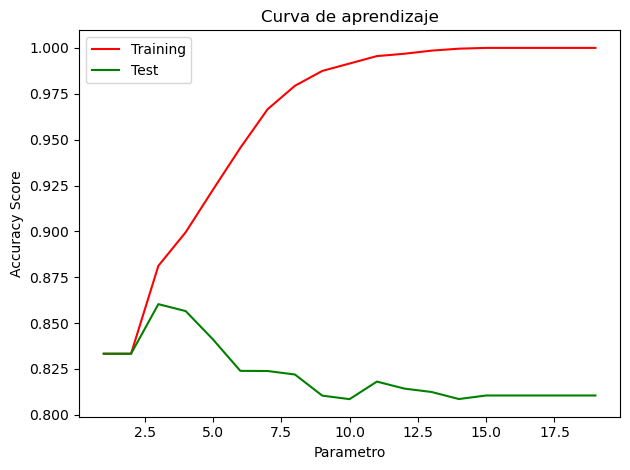

In [26]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Al observar la gráfica, se aprecia claramente que la curva verde, que representa el rendimiento en el conjunto de prueba, alcanza su punto máximo en el valor del parámetro = 3. Por lo tanto, al utilizar un árbol de decisión con una profundidad de 3, lograremos el mayor número de aciertos al clasificar si un paciente tiene enfermedad cardíaca o no, al evaluar los datos del conjunto de prueba. Además, el rendimiento en el conjunto de entrenamiento no llega al 100%, lo que indica que el modelo no ha sobreaprendido los datos de entrenamiento.

A medida que aumentamos la profundidad del árbol más allá de 3, observamos que la precisión en el conjunto de prueba comienza a disminuir, lo que resulta en una clasificación menos precisa. Esto es algo que queremos evitar. Además, el modelo comienza a sobreajustarse cada vez más a los datos de entrenamiento, lo que no es deseable. 

En resumen, el árbol de profundidad 3 proporciona el mejor equilibrio entre precisión en la clasificación y generalización del modelo.

A continuación observemos el árbol de profundidad 3 resultante.

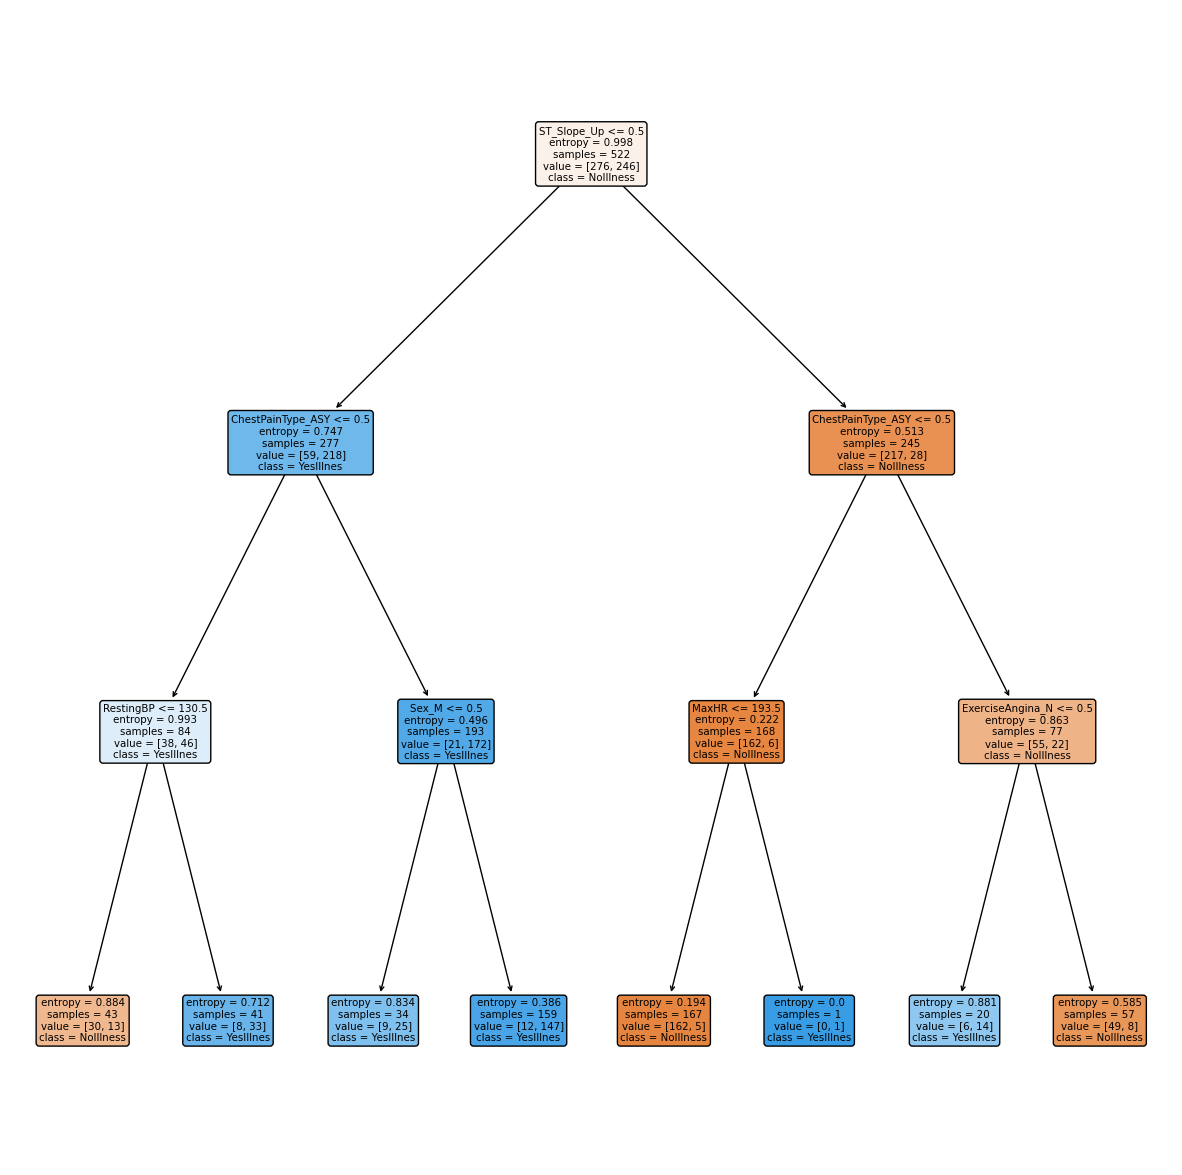

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Creamos un árbol de decisión con la configuración por defecto y lo entrenamos
clf = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion = "entropy", max_depth=3)
clf = clf.fit(X_train, y_train)
# Pintamos el árbol
plt.figure(figsize=(15,15))
eature_names_columns = ['Age', 'RestingBP',	'Cholesterol',	'FastingBS',	'MaxHR',	'Oldpeak'	,'Sex_F',	'Sex_M',	'ChestPainType_ASY',	'ChestPainType_ATA',	'ChestPainType_NAP',	'ChestPainType_TA',	'RestingECG_LVH',	'RestingECG_Normal',	'RestingECG_ST',	'ExerciseAngina_N',	'ExerciseAngina_Y',	'ST_Slope_Down',	'ST_Slope_Flat',	'ST_Slope_Up']
class_names_columns = ['NoIllness', 'YesIllnes']
plot_tree(clf, filled=True, feature_names=feature_names_columns, class_names=class_names_columns, rounded=True)
plt.show()

## 4.3) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

### Cálculo de la precisión, exhaustividad y valor F1

In [28]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
# Ponemos 1 en el max depth porque es lo que mejor resultado nos genera
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, X_train, y_train, scoring=scoring_metrics,
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8653268438272491
Exhaustividad ponderada media:  0.8603410740203193
F1 ponderado media:  0.8599619266189574


La precisión ponderada media es una medida que indica la proporción de predicciones positivas que fueron correctas en promedio, por tanto, en nuestro caso, una precisión ponderada media de 0.865 significa que, el 86.5% de las veces que el modelo predijo que una persona tiene enfermedad cardíaca, esa predicción fue correcta.

La exhaustividad ponderada media indica la proporción de casos positivos que el modelo identificó correctamente. Una exhaustividad ponderada media de 0.86 significa que el modelo identificó correctamente el 86% de las personas que realmente tenían enfermedad cardíaca.

La puntuación F1 ponderada media es la media ponderada de la precisión y la exhaustividad. Un valor de F1 ponderado medio de 0.859 indica que el modelo tiene un buen equilibrio entre la precisión y la exhaustividad en general.

Por tanto, en general, como todos estos valores son bastantes altos, podemos afirmar que nuestro modelo aprende bastante bien.

### Informe detallado de las clases y matriz de confusión

In [29]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
clf.fit(X_train, y_train)
predictions = cross_val_predict(clf, X_test, y_test, cv=10)

# Informe por clases
target_names_conclussion = ['NoIllness',  'YesIllness']
cr = classification_report(y_test,predictions, target_names=target_names_conclussion)
print(cr)

              precision    recall  f1-score   support

   NoIllness       0.80      0.82      0.81       114
  YesIllness       0.81      0.78      0.80       110

    accuracy                           0.80       224
   macro avg       0.80      0.80      0.80       224
weighted avg       0.80      0.80      0.80       224



A partir de ahora llamaremos NoIllness a los pacientes que no tengan enfermedad cardiaca, y YesIllnes a los que si. Estas dos serán nuestras clases en el estudio. 

Para valorar la precisión con la que el árbol de decisión acertará, le proporcionamos nuevos datos, no aquellos con los que ha aprendido, si no el 30% que habíamos separado al principio.

Estos datos indican que la precisión de clasificar a un paciente como "NoIllness" es del 80%. Esto significa que de todos los pacientes que el modelo clasifica como "NoEnfermo", el 80% de ellos realmente no tienen ninguna enfermedad. Mientras que los clasificados como "YesIllness" tienen 81%, prácticamente la misma, y por tanto, el 81% de ellos realmente si tienen una enfermedad.

Por otro lado, la exhaustividad de clasificar a un paciente como "NoIllness" es del 82%. Esto indica que de todos los pacientes que realmente no tienen ninguna enfermedad, el modelo es capaz de identificar correctamente al 82% de ellos como "NoIllness". Por otro lado, solo el 78% de los pacientes que realmente tienen la enfermedad, son clasificados por el árbol de decisión.

En cuanto a la media armónica f1-score, podemos ver que YesIllness es ligeramente inferior a NoIllness con un 80% frente a un 81%.

In [30]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[94 20]
 [24 86]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

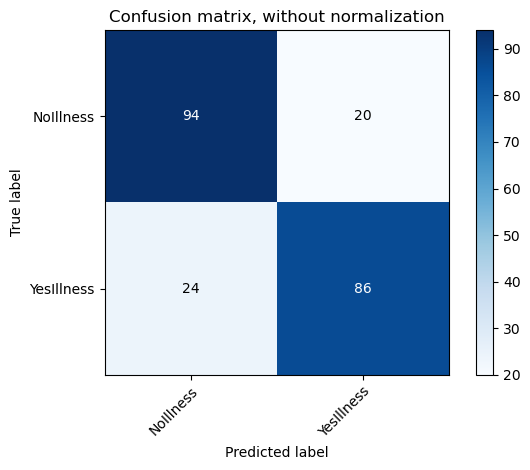

In [31]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
# plot_confusion_matrix(df_number['HeartDisease'], predictions, target_names_conclussion , normalize=False)
plot_confusion_matrix(y_test, predictions, target_names_conclussion , normalize=False)

Interpretando la matriz de confusión, vemos que de los 118 pacientes cuya predicción era que no desarrollasen una enfermedad cardíaca, 24 de los mismos sí la han acabado desarrollando. Por tanto, se puede comprobar que se ha cometido un error en el diagnóstico de un 20,33% de los pacientes que se esperaba que no desarrollasen ninguna enfermedad cardíaca. 

Por otro lado, de los 106 pacientes que se esperaba que desarrollasen la enfermedad, 20 de ellos no han cumplido con lo previsto y no han tenido ningún problema cardíaco. Este dato se corresponde con un 18,87% de los pacientes que se esperaba que desarrollasen una enfermedad. 

Por tanto, podemos concluir que de los 224 pacientes que han participado en el estudio (en la parte de test), el 80,35% de los mismos han cumplido con el pronóstico realizado.

### Fiabilidad en una empresa y en la vida real

A continuación comentaremos las ventajas y desventajas de utilizar un árbol de decisión para clasificar si una persona tiene problemas cardíacos en el contexto empresarial y en la vida real y basándonos en los resultados obtenidos en este estudio concreto.

**Ventajas:**

1. **Interpretación sencilla:** Los árboles de decisión son fáciles de entender y explicar. Esto es útil tanto para expertos en el campo de la medicina como para aquellos que no lo son, lo que facilita la toma de decisiones basada en el modelo.

2. **Identificación de factores importantes:** Los árboles de decisión pueden resaltar qué características son las más importantes para la clasificación, lo que podría ser valioso para identificar factores de riesgo para problemas cardíacos en una población.

**Desventajas:**

1. **Propensión al sobreajuste:** Los árboles de decisión pueden ser propensos al sobreajuste, lo que significa que pueden adaptarse demasiado a los datos de entrenamiento específicos y no generalizar bien a nuevos datos. Esto puede llevar a predicciones inexactas y poco fiables.

2. **Posibilidad de errores de clasificación:** Aunque los árboles de decisión pueden ser precisos en muchos casos, aún pueden cometer errores de clasificación. Esto es especialmente problemático en el contexto médico, donde los errores podrían tener consecuencias graves para la salud de los pacientes. Esto lo vemos claramente, en que hay 20 personas a las que se les ha dicho que no tienen enfermedad, cuando en realidad sí la tienen. Esto es una cifra demasiado elevada para una vida humana.

Por tanto consideramos que en un contexto médico como la predicción de problemas cardíacos, estas ventajas y desventajas deben ser cuidadosamente consideradas antes de utilizar un árbol de decisión como herramienta de diagnóstico. Si fuera una empresa de otro tipo, dónde no fuese tan importante unos porcentajes de error, consideramos que el árbol de decisión sería de las mejores técnicas a usar por su sencillez.

## 5) Resuelve el mismo problema usando un clasificador k-NN

### Preprocesamiento de los datos

Al analizar la tabla de los datos de correlación, se observa que la distribución de las variables es casi normal en su comportamiento. Por consiguiente, se concluye que para abordar el problema utilizando el algoritmo k-Nearest Neighbors (kNN), el cual depende de las distancias entre puntos para la clasificación o predicción, resulta prudente normalizar los datos. 

La normalización se presenta como una opción favorable en este contexto, ya que ajusta las características para que tengan una media de cero y una desviación estándar de uno (o algún otro rango específico). Esto tiene como objetivo homogeneizar la escala de todas las características, garantizando así que cada una contribuya de manera equitativa a la distancia calculada entre puntos. En consecuencia, la normalización de los datos puede mejorar la eficacia y precisión del modelo kNN al igualar la importancia relativa de cada característica en el proceso de clasificación.

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Normalizamos los datos escalándolos al intervalo [0,1]
scaler = MinMaxScaler()

df_estandarizado = df_number.iloc[0:,].copy()

# Fase de ajuste
scaler.fit(df_estandarizado[['Age','RestingBP',	'Cholesterol',	'FastingBS'	,'MaxHR'	,'Oldpeak',	'HeartDisease',	'Sex_F'	,'Sex_M',	'ChestPainType_ASY','ChestPainType_NAP'	,'ChestPainType_TA',	'ChestPainType_ATA' ,'RestingECG_LVH',	'RestingECG_Normal',	'RestingECG_ST'	,'ExerciseAngina_N'	,'ExerciseAngina_Y'	,'ST_Slope_Down',	'ST_Slope_Flat'	,'ST_Slope_Up']])

# Fase de transformación
df_estandarizado[['Age (minmax)','RestingBP (minmax)',	'Cholesterol (minmax)',	'FastingBS (minmax)'	,'MaxHR (minmax)'	,'Oldpeak (minmax)',	'HeartDisease (minmax)',	'Sex_F (minmax)'	,'Sex_M (minmax)',	'ChestPainType_ASY (minmax)','ChestPainType_NAP (minmax)'	,'ChestPainType_TA (minmax)',	'ChestPainType_ATA (minmax)' ,'RestingECG_LVH (minmax)',	'RestingECG_Normal (minmax)',	'RestingECG_ST (minmax)'	,'ExerciseAngina_N (minmax)'	,'ExerciseAngina_Y (minmax)'	,'ST_Slope_Down (minmax)',	'ST_Slope_Flat (minmax)'	,'ST_Slope_Up (minmax)']] = scaler.transform(df_estandarizado[['Age','RestingBP',	'Cholesterol',	'FastingBS'	,'MaxHR'	,'Oldpeak',	'HeartDisease',	'Sex_F'	,'Sex_M',	'ChestPainType_ASY','ChestPainType_NAP'	,'ChestPainType_TA',	'ChestPainType_ATA' ,'RestingECG_LVH',	'RestingECG_Normal',	'RestingECG_ST'	,'ExerciseAngina_N'	,'ExerciseAngina_Y'	,'ST_Slope_Down',	'ST_Slope_Flat'	,'ST_Slope_Up']])

df_estandarizado = df_estandarizado.drop(['Age','RestingBP',	'Cholesterol',	'FastingBS'	,'MaxHR'	,'Oldpeak',	'HeartDisease',	'Sex_F'	,'Sex_M',	'ChestPainType_ASY','ChestPainType_NAP'	,'ChestPainType_TA',	'ChestPainType_ATA' ,'RestingECG_LVH',	'RestingECG_Normal',	'RestingECG_ST'	,'ExerciseAngina_N'	,'ExerciseAngina_Y'	,'ST_Slope_Down',	'ST_Slope_Flat'	,'ST_Slope_Up'], axis=1)

df_estandarizado_no_hd = df_estandarizado.drop(['HeartDisease (minmax)'], axis = 1)

df_estandarizado.head()
df_estandarizado_no_hd.head()

,Age (minmax),RestingBP (minmax),Cholesterol (minmax),FastingBS (minmax),MaxHR (minmax),Oldpeak (minmax),Sex_F (minmax),Sex_M (minmax),ChestPainType_ASY (minmax),ChestPainType_NAP (minmax),ChestPainType_TA (minmax),ChestPainType_ATA (minmax),RestingECG_LVH (minmax),RestingECG_Normal (minmax),RestingECG_ST (minmax),ExerciseAngina_N (minmax),ExerciseAngina_Y (minmax),ST_Slope_Down (minmax),ST_Slope_Flat (minmax),ST_Slope_Up (minmax)
0,0.244898,0.444444,0.393822,0.0,0.774436,0.015873,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.629630,0.183398,0.0,0.654135,0.174603,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.351852,0.382239,0.0,0.218045,0.015873,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.425926,0.249035,0.0,0.293233,0.253968,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.537037,0.212355,0.0,0.398496,0.015873,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


### 5.1) Estimando la tasa de acierto

Ponemos k = 3 por defecto y estimamos una tasa de acierto. Además, dividimos los datos de nuevo en un 30% test y un 70% de entrenamiento.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(df_estandarizado_no_hd.values, df['HeartDisease'],
                                                    test_size=0.3, stratify=df['HeartDisease'],
                                                    random_state=RANDOM_STATE)
# Creamos el clasificador k-NN
# Podemos fijar los pesos como 'uniform' o inv. proporcionales a la distancia 'distance'
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Entrenar el clasificador
clf.fit(X_train, y_train)

# Medir la tasa de aciertos o exactitud (accuracy) en los conjuntos de entrenamiento y test
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

train_accuracy, test_accuracy

(1.0, 0.8392857142857143)

Precisión de entrenamiento: Un valor de 1.0 significa que el modelo predijo correctamente todas las muestras en el conjunto de datos de entrenamiento. Esto sugiere que el modelo se ajusta muy bien a los datos de entrenamiento, aunque sobreaprende.

Precisión de prueba: Un valor de 0.8392857142857143 indica que el modelo predijo correctamente aproximadamente el 83.9% de las muestras en el conjunto de datos de prueba. Esta métrica es crucial ya que indica cómo se desempeña el modelo en datos no vistos, lo que es fundamental para evaluar su capacidad de generalización.

El valor de accuracy del entrenamiento siempre será más alto que el del test ya que estamos prediciendo datos que se han usado para entrenar el modelo.

In [34]:
# validación cruzada
from sklearn.model_selection import cross_validate
import numpy as np

scores = cross_validate(clf, X_train, y_train, scoring='accuracy',
                        cv=10, return_train_score=True)

# scores es un diccionario con datos sobre tiempos y exactitud (accuracy)
train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
train_accuracy, test_accuracy

(1.0, 0.8446661828737302)

Vemos que tras aplicar la valoración cruzada, el accuracy del entrenamiento sigue siendo de 1 mientras que la exactitud del test es de 0,844, que se trata de un valor superior al calculado anteriormente. Por tanto, como ya hemos comentado en el árbol de decisión, la valoración cruzada es mejor.

### 5.2) Buscar el valor óptimo de K

En este estudio, exploraremos diferentes valores de k y evaluaremos su impacto en la capacidad de predicción del algoritmo kNN. Este proceso nos permitirá identificar el valor de k que maximiza la precisión del modelo, brindando así información valiosa para la toma de decisiones clínicas y el diagnóstico de enfermedades cardíacas.

In [35]:
# Medias y desviaciones típicas de accuracy para distintos valores de k
accuracy_mean = []
accuracy_std = []

k_values = range(1,15)
for k in k_values:
    # Entrenar y validar
    clf = KNeighborsClassifier(k, weights='distance')
    scores = cross_validate(clf, X_train ,y_train, scoring='accuracy', cv=10)

    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))

accuracy_mean

[0.8100507982583454,
 0.8100507982583454,
 0.8446661828737302,
 0.8408200290275764,
 0.8562046444121917,
 0.8446661828737302,
 0.8562046444121917,
 0.8503991291727141,
 0.8504354136429608,
 0.8504354136429608,
 0.8542452830188679,
 0.8522859216255443,
 0.8599782293178521,
 0.8542452830188679]

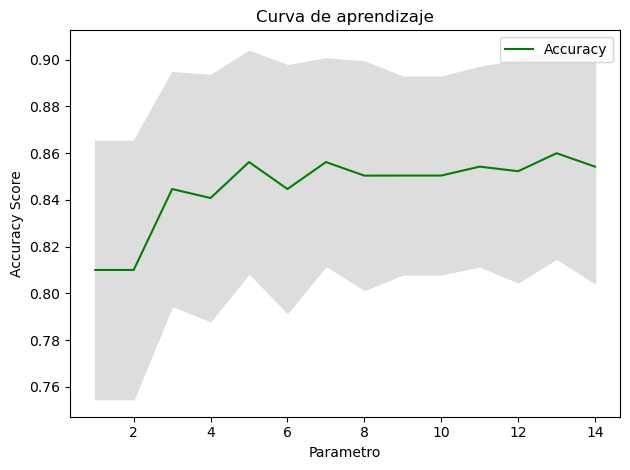

In [36]:
# Dibujamos la línea con la accuracy (exactitud) en el test
plt.plot(k_values, accuracy_mean, color="g", label="Accuracy")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Tras analizar detenidamente la gráfica, se destaca que el valor más alto de exactitud (accuracy) se logra cuando k es igual a 13. Por consiguiente, determinamos que k=13 representa nuestro valor óptimo de vecinos más cercanos para el algoritmo kNN en este estudio específico. Este valor optimizado de k resulta en una precisión (accuracy) de 0.8599782293178521, lo que indica que aproximadamente el 86% de las clasificaciones realizadas por el modelo son correctas. Este descubrimiento es esencial, ya que proporciona una base sólida para la implementación del modelo en la práctica clínica, mejorando así la capacidad de diagnóstico de enfermedades cardíacas con mayor precisión y confiabilidad.

### 5.3) Estudiando el error

In [37]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_validate

scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']
clf = KNeighborsClassifier(13, weights='distance')
scores = cross_validate(clf, X_train, y_train, scoring=scoring_metrics,
                        cv=10, return_train_score=False)

print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.864834340941325
Exhaustividad ponderada media:  0.8599782293178521
F1 ponderado media:  0.8597556011519266


Ahora, una vez encontrado el valor óptimo k = 13 vemos cuánto de bueno es nuestro modelo. 

Los valores proporcionados son métricas importantes para evaluar el desempeño del modelo kNN con k=13 en la predicción de enfermedades cardíacas:

1. **Precisión ponderada media:** 0.8648. Indica la precisión promedio del modelo para predecir correctamente si un paciente tiene o no una enfermedad cardíaca. Un 86% de precisión es bastante elevado, y por tanto, el modelo ha aprendido correctamente sin llegar a sobreaprender.

2. **Exhaustividad ponderada media:** 0.8599. Muestra la capacidad del modelo para identificar correctamente a los pacientes que realmente tienen una enfermedad cardíaca. 

3. **F1 ponderado media:** 0.8598. Representa una medida general de la precisión del modelo en la identificación de pacientes con enfermedades cardíacas, considerando tanto la precisión como la exhaustividad.

Estos valores sugieren que el modelo kNN con k=13 tiene un buen desempeño en la predicción de enfermedades cardíacas, siendo confiable y preciso en su capacidad para identificar correctamente si un paciente tiene o no una enfermedad cardíaca.

In [38]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = KNeighborsClassifier(13, weights='distance')
# Entrenar el clasificador
clf.fit(X_train, y_train)

predictions = cross_val_predict(clf, X_test, y_test, cv=10)

# Informe por clases
cr = classification_report(y_test, predictions, target_names=['NoIllness', 'YesIllness'])
print(cr)

              precision    recall  f1-score   support

   NoIllness       0.88      0.85      0.86       117
  YesIllness       0.84      0.87      0.85       107

    accuracy                           0.86       224
   macro avg       0.86      0.86      0.86       224
weighted avg       0.86      0.86      0.86       224



Al evaluar el conjunto de datos reservado para pruebas, observamos los valores de precisión (precision) y exhaustividad (recall). Un recall del 87% para la clase "YesIllness" indica un alto nivel de acierto en la identificación de personas con enfermedad cardíaca. Específicamente, esto sugiere que de cada 100 personas diagnosticadas por el modelo como positivas para enfermedad cardíaca, 87 realmente la tienen. Además, el recall del "NoIllness" también es significativo. Aunque idealmente se aspira a un 100% de recall para garantizar la identificación precisa de todas las personas sanas, en el contexto médico se valora el enfoque preventivo. En este sentido, un recall alto, incluso si no alcanza el 100%, se considera aceptable, ya que enfatiza la importancia de identificar la ausencia de enfermedad en una proporción sustancial de casos, lo que permite adoptar medidas preventivas adecuadas.

### Matriz de confusión

A continuación, vamos a crear la matriz de confusión. De esta manera podremos ver el número de instancias real de la clase NoIllness y YesIllness, así como el número de instancias predichas por el clasificador.

Confusion matrix, without normalization
[[101  16]
 [ 12  95]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

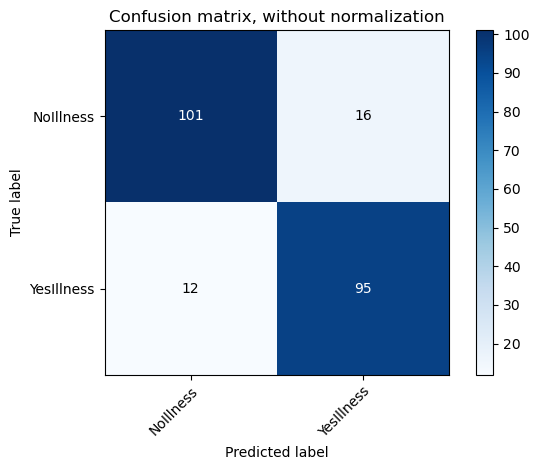

In [39]:
from sklearn.metrics import confusion_matrix

y_test_predicted =clf.predict(X_test)
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(y_test, y_test_predicted, ['NoIllness', 'YesIllness'], normalize=False)

Los resultados obtenidos revelan que de las 113 personas cuya predicción fue que no desarrollarían ninguna enfermedad, 12 de ellas sí han desarrollado una enfermedad cardíaca. Esto representa un 10.6% de las predicciones de personas sin enfermedad cardíaca que no se han cumplido.

Por otro lado, de las 111 personas cuya predicción fue que desarrollarían enfermedad cardíaca, 16 de ellas no la han desarrollado. Esto significa que el 14.4% de las predicciones fueron incorrectas en el caso de personas con problemas cardíacos.

En resumen, más del 87.5% de las predicciones se han cumplido satisfactoriamente. Este porcentaje indica un alto grado de precisión del modelo, lo que sugiere que es efectivo en la predicción de enfermedades cardíacas. En consecuencia, se considera que este modelo es robusto y confiable para su implementación en el contexto médico.

Añadimos como extra la matriz normalizada.

Normalized confusion matrix
[[0.84615385 0.15384615]
 [0.13084112 0.86915888]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

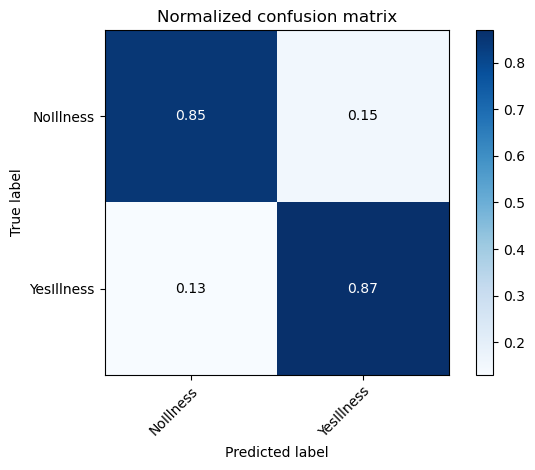

In [40]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(y_test, predictions, ['NoIllness', 'YesIllness'], normalize=True)

### Fiabilidad en la vida real y en una empresa

A continuación comentamos ventajas y desventajas de utilizar el modelo k-Nearest Neighbors (kNN) para clasificar si una persona tiene problemas cardíacos en el contexto empresarial y en la vida real, basándonos en los resultados proporcionados:

**Ventajas:**

1. **Facilidad de implementación:** kNN es un algoritmo simple y fácil de implementar. 

2. **Buena interpretación:** Los resultados del modelo kNN pueden ser fácilmente interpretados, ya que se basa en la similitud con las instancias de datos vecinos. Esto puede ser útil para médicos y profesionales de la salud al explicar las decisiones del modelo a los pacientes.

**Desventajas:**

1. **Sensible a los datos atípicos:** kNN puede ser sensible a los datos atípicos o ruidosos, lo que puede afectar negativamente su rendimiento si no se manejan adecuadamente. Como por ejemplo, si en este caso, no hubierámos borrado los datos de los pacientes con colesterol = 0.

2. **Costoso en tiempo de cálculo:** El cálculo de las distancias entre cada punto y sus vecinos más cercanos puede ser computacionalmente costoso.

3. **Dependencia de la elección de k:** La elección del valor de k puede influir significativamente en el rendimiento del modelo. Un valor inapropiado de k puede llevar a resultados subóptimos.

En el contexto médico, se considera que el modelo k-Nearest Neighbors (kNN) es adecuado siempre y cuando el conjunto de datos no presente datos atípicos o erróneos, una condición que puede resultar difícil de asegurar. En comparación, en el ámbito empresarial, el uso de kNN sigue siendo una opción viable; sin embargo, el modelo de árbol de decisión puede resultar más apropiado debido a su simplicidad y facilidad de interpretación.

La elección entre kNN y árboles de decisión dependerá de las necesidades específicas del problema en cuestión. En situaciones donde se requiere un alto grado de precisión y se pueden gestionar los desafíos asociados con kNN, como la sensibilidad a los datos atípicos, kNN puede ser preferible. Por otro lado, si la simplicidad y la interpretabilidad son prioritarias, los árboles de decisión pueden ser la opción preferida.

## 6) Resuelve el mismo problema usando un clasificador MLP

### 6.1) Estimando la tasa de acierto

Al igual que en el apartado anterior, como hemos analizado la tabla de datos de correlacioón y hemos observado que la distribución de las variables es muy parecida a la de una normal, concluimos que para abordar el problema utilizando el algoritmo MLP debemos usar los datos normalizados.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_estandarizado_no_hd.values, df['HeartDisease'],
                                                    test_size=0.3, stratify=df['HeartDisease'],
                                                    random_state=RANDOM_STATE)

Estimamos la tasa de acierto suponiendo el parámetro alpha = 0.3.

In [42]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.3, batch_size=100,
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)

# Entrenar el clasificador
mlp.fit(X_train, y_train)
# Medir la tasa de aciertos o exactitud (accuracy) en los conjuntos de entrenamiento y test
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)

train_accuracy, test_accuracy

(0.8869731800766284, 0.8705357142857143)

Precisión de entrenamiento: Vemos que en este caso el modelo no ha predecido con total certeza todas las muestras en el conjunto de netrenamiento, ya que el resultado tiene un valor de 0.8869. Podemos interpretarlo como que el modelo no se ajusta tan bien como en los dos casos anteriores.

Precisión de prueba: Como obtenemos un valor de 0.8705357, sabemos que el modelo predijo correctamente aproximadamente el 87.05% de las muestras en el conjunto de datos de prueba. Podremos usar estos datos para dar un vaticinio acerca de la capacidad de generalización del modelo.

Como hemos indicado anteriormente, el valor de accuracy del test nunca podrá superar al del entrenamiento ya que estamos prediciendo datos que se han usado para entrenar el modelo.

In [43]:
# validación cruzada
from sklearn.model_selection import cross_validate
import numpy as np

scores = cross_validate(mlp, X_train, y_train, scoring='accuracy',
                        cv=10, return_train_score=True)

# scores es un diccionario con datos sobre tiempos y exactitud (accuracy)
train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
train_accuracy, test_accuracy

(0.9029356258222565, 0.8677068214804065)

Tomamos de nuevo el 70% del conjunto de entrenamiento y lo dividimos en 10 partes para evaluar como se comporta el modelo en diversas situaciones de validación. En esto es en lo que consiste la validación cruzada, que refleja una imagen más fiel de comportamiento del modelo en diferentes conjuntos de datos.
Podemos observar como la precisión del conjunto de entrenamiento ha mejorado, ya que el valor pasa a ser superior al 0.90. Sin embargo, experimentamos un ligero retroceso en cuanto a la prexisión del modelo con respecto al conjunto de datos de prueba, ya que el valor disminuye a 0.8677068. Podemos concluir que el modelo no generaliza perfectamente en los datos de prueba, aunque ofrece unos resultados bastante buenos.

En ambos casos, tanto con validación cruzada como sin ella, podemos decir que a pesar de que el modelo no alcanza el 100% de precisión en los datos de entrenamiento, logra generalizar bien a los datos de prueba. Esto sugiere que el modelo ha aprendido patrones relevantes en los datos de entrenamiento que se aplican de manera efectiva a nuevos datos no vistos. Aunque el modelo podría estar ligeramente subajustado (underfitting) a los datos de entrenamiento, no parece estar sobreajustado (overfitting), ya que su rendimiento en los datos de prueba es similar al de los datos de entrenamiento. Esto indica que el modelo no está memorizando los datos de entrenamiento, sino que está capturando patrones más generales que se aplican a datos nuevos.

### 6.2) Buscando el valor óptimo del coeficiente de regularización

Vamos a buscar el mejor coeficiente de regularización mediante validación cruzada.

Exploraremos una red con una capa oculta con 100 neuronas, función de activación ReLU, tamaño de mini-batch 100, tasa de aprendizaje 0.001, y máximo de 500 iteraciones a los datos (epochs).

In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
import numpy as np

accuracy_mean = []
accuracy_std = []

# Entrenar y validar distintas configuraciones
# regul_param_range = np.arange(0.1, 2.1, step=0.2) # [0.5, 0.75,  ..., 2]
regul_param_range = np.arange(0.1, 2.1, step=0.2) # [0.5, 0.75,  ..., 2]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100,
             learning_rate_init=0.001, max_iter=1000, random_state=RANDOM_STATE)

    scores = cross_validate(mlp, X_train, y_train, scoring='accuracy', cv=10)
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))

accuracy_mean

[0.8524310595065312,
 0.8677068214804065,
 0.8600145137880988,
 0.8618650217706822,
 0.8600145137880988,
 0.8466618287373004,
 0.8505079825834543,
 0.8524310595065312,
 0.8505079825834543,
 0.8505079825834543]

Representamos los resultados obtenidos mediante la gráfica para hacer el análisis de una manera más visual.

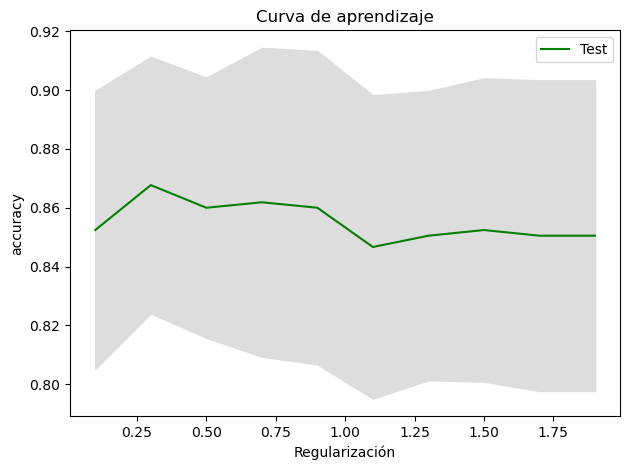

In [45]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(regul_param_range, accuracy_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización"), plt.ylabel("accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Podemos observar como el valor más alto de accuracy se obtiene cuando alpha = 0.3. Por tanto, podemos decir que 0.3 representa el valor óptimo de alpha para el algoritmo MLP en este caso. El valor del accuracy cuando alpha = 0.3 asciende hasta 8677068214804065, lo que indica que el 86,77% de las veces el clasificador acierta en sus predicciones. Al igual que ocurría en el caso del algoritmo KNN, se observa en la gráfica que se tiene un comportamiento bastante estable del parámetro alpha en el rango de 0.1 a 2.1.


### 6.3) Estudiando el error

In [46]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_validate

# Escribimos las métricas que queremos evaluar
# Precisión, Exhausitividad y F1 se calculan para cada clase
# Existen diferentes formas de agregar el resultado de cada clase.
# Nosotors optamos por calcular el valor de cada clase, y hacer una media ponderada según
# la proporción de instancias de cada clase en la muestra porque la muestra está desbalanceada
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Los mejores resultados se obtenían para k=4 sobre los datos re-escalados
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.3, batch_size=100,
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)

# Calculamos las métricas sobre los datos escalados utilizando validación cruzada
# Por defecto usa "estratificación"
scores = cross_validate(clf, X_train, y_train, scoring=scoring_metrics,
                        cv=10, return_train_score=False)

print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8706396135562727
Exhaustividad ponderada media:  0.8677068214804065
F1 ponderado media:  0.8675227493987373


Observamos la aptitud de nuestro modelo mediante los resultados obtenidos con el valor del parámetro alpha = 0.3.

Estos resultados representan métricas importantes para evaluar la efectividad del clasificador MLP a la hora de predecir las patologías cardíacas.

1. **Precisión ponderada media:** 0.8706. Esta métrica indica la media de precisión del modelo para predecir correctamentesi un paciente tiene o no una enfermedad cardíaca. Obtenemos una media de precisión ponderada del 87.06%, que representa un porcentaje bastante alto y contribuye al aprendizaje del modelo.

2. **Exhaustividad ponderada media:** 0.8677. Muestra la capacidad del modelo para identificar correctamente a los pacientes que realmente tienen una enfermedad cardíaca. Obtener un 86.77% de exhaustividad es un dato bastante alentador ya que es bastante alto también. 

3. **F1 ponderado media:** 0.8675. Representa una medida general de la precisión del modelo en la identificación de pacientes con enfermedades cardíacas, considerando tanto la precisión como la exhaustividad. Obtener un 86.75% en este ámbito es una gran noticia, ya que representa un buen equilibrio entre precisión y exhaustividad del clasificador MLP.


In [47]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.3, batch_size=100,
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)

# Entrenar el clasificador
mlp.fit(X_train, y_train)

predictions = cross_val_predict(clf, X_test, y_test, cv=10)

# Informe por clases
cr = classification_report(y_test, predictions, target_names=['NoIllness', 'YesIllness'])
print(cr)

              precision    recall  f1-score   support

   NoIllness       0.89      0.87      0.88       117
  YesIllness       0.86      0.89      0.88       107

    accuracy                           0.88       224
   macro avg       0.88      0.88      0.88       224
weighted avg       0.88      0.88      0.88       224



Al igual que en los modelos anteriores, para valorar la precisión con la que el clasificador MLP acertará, le proporcionamos los datos que corresponden con la parte del test, que se corresponde con el 30% restante que nos queda por estudiar.

Podemos observar en los datos anteriores que la precisión de clasificar a un paciente como "NoIllness" es del 89%, es decir, que de todos los pacientes que el modelo predice que no tendrán una enfermedad, el 89% de ellos cumplirá con los pronósticos.
Por otro lado, los clasificados como "YesIllness" tienen 86%, un valor ligeramente inferior, pero bastante alto a su vez.

En cuanto a la exhaustividad, en el caso de "NoIllness" obtenemos un 87%. Esto indica que de todos los pacientes que realmente no tienen ninguna enfermedad, el modelo es capaz de identificar correctamente al 87% de ellos como "NoIllness". Por otro lado, el 89% de los pacientes que acaban desarrollando la enfermedad son diagnosticados correctamente.

Por último, vemos que los valores de "NoIllness" y "YesIllness" en cuanto a f1_score son iguales, con un 88%. Esto quiere decir que a pesar de que en algunos casos alguna de las variables tiene un valor mayor de precisión o de exhaustividad, ambas están igual de balanceadas.

A continuación, vamos a mostrar la matriz de confusión:

Confusion matrix, without normalization
[[100  17]
 [ 12  95]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

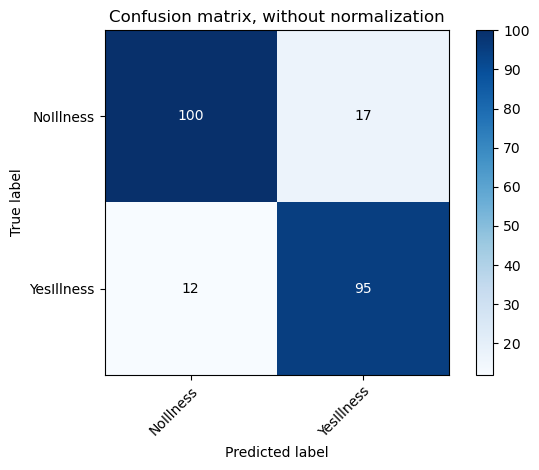

In [48]:
from sklearn.metrics import confusion_matrix
y_test_predicted =mlp.predict(X_test)
plot_confusion_matrix(y_test, y_test_predicted, ['NoIllness', 'YesIllness'], normalize=False)

Podemos ver que la matriz de confusión recoge los siguientes resultados:

De las 112 personas cuya predicción de diagnóstico había sido quen no desarrollarían ninguna enfermedad, 12 de ellas sí lo han hecho, contribuyendo a un error del 10.71% en este tipo de predicciones. 

Por otro lado, de los otros 112 individuos que fueron predecidos como que sí desarrollarían alguna enfermedad, cabe destacar que 95 sí que han cumplido el pronóstico, mientras que 17 de ellos no lo han hecho. Por tanto, el 15.17% de los diagnósticos fueron incorrectos en este caso.

Podemos concluir que de los 224 pacientes, más del 87.05% cumplido con las expectativas del diagnóstico. Representa un alto porcentaje, a pesar de que en el ámbito de la medicina deberían alcanzarse valores mucho más altos por el bien tanto de los médicos como de los pacientes.

Añadimos a su vez la matriz normalizada.

Normalized confusion matrix
[[0.87179487 0.12820513]
 [0.11214953 0.88785047]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

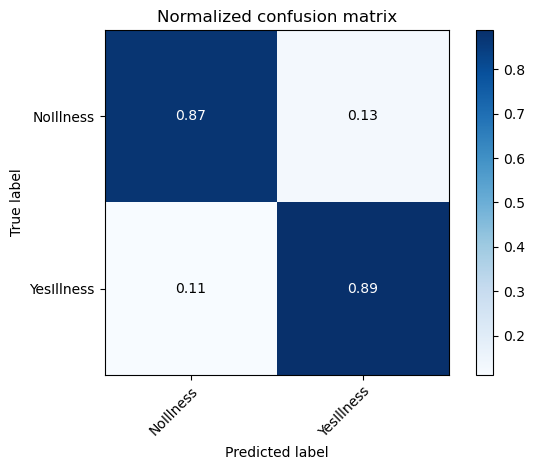

In [49]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(y_test, predictions, ['NoIllness', 'YesIllness'], normalize=True)

### Fiabilidad en la vida real y en una empresa

Vamos a comentar las ventajas y desventajas de utilizar el modelo MLP para clasificar si una persona tiene problemas cardíacos en el contexto empresarial y en la vida real, basándonos en los resultados proporcionados:

**Ventajas:**

1. **Implementación sencilla:** MLP es un algoritmo simple en cuanto a la implementación se refiere. 

2. **Generalización:** Cuando se entrena adecuadamente, un MLP puede generalizar bien a datos no vistos, lo que lo hace útil para la predicción en nuevos casos. Esto puede ser de gran utilidad para los médicos a la hora de poder dictaminar un diagnóstico del paciente.

3. **Flexibilidad en la arquitectura:** Los MLP permiten la configuración de múltiples capas ocultas y neuronas por capa, lo que proporciona una mayor flexibilidad para modelar relaciones complejas en los datos.

**Desventajas:**

1. **Dificultad para interpretar los resultados:** Debido a la naturaleza compleja de los MLP y la gran cantidad de parámetros, puede ser difícil interpretar cómo y por qué el modelo toma ciertas decisiones.

2. **Lento y costoso** Dependiendo del tamaño de la red y la complejidad del problema, el entrenamiento de un MLP puede ser computacionalmente costoso y requerir mucho tiempo. 

En el contexto médico, algunas ventajas son el descubrimiento de patrones ocultos en datos médicos, ya que como los MLP pueden identificar patrones complejos y relaciones no lineales entre los datos clínicos, esto puede ser invaluable para descubrir biomarcadores y factores de riesgo ocultos en diversas enfermedades. Además, aprovechando la capacidad de los MLP para aprender de grandes conjuntos de datos, los médicos pueden utilizar modelos basados en MLP para personalizar tratamientos y predecir resultados específicos para pacientes individuales, mejorando así la atención personalizada y la eficacia del tratamiento.

En el ámbito empresarial, puede servir de gran ayuda en el análisis de grandes conjuntos de datos empresariales para identificar patrones complejos y predecir tendencias futuras en áreas como ventas, marketing, finanzas y operaciones. A su vez, puede contribuir en el desarrollo de la automatización de tareas repetitivas como atención al cliente, procesamiento de datos y análisis de texto, liberando tiempo y recursos para actividades más estratégicas.

Cabe destacar que todas estas ventajas se pueden dar siempre y cuando no se utilicen modelos de aprendizaje profundo con múltiples capas ocultas que dificulte la interpretación de los datos tanto en el ámbito médico como en el empresarial.

## 7) Comparación de resultados

Muestra los resultados en test de los mejores modelos.
Discute cual es el mejor.

A continuación, con los resultados obtenidos en test, vamos a discutir cuál de ellos es mejor. 

En primer lugar vamos a hacer un breve resumen acerca de los datos obtenidos en cada uno de los 3 modelos:

#### Árboles de decisión
Llegamos a la conclusión de que el mejor modelo para árboles de decisión se obtenía cuando la profundidad del árbol era igual a 3. Los datos obtenidos para el entrenamiento eran: 
1. **Precisión ponderada media:**  0.8653268438272491
2. **Exhaustividad ponderada media:**  0.8603410740203193
3. **F1 ponderado media:**  0.8599619266189575

Una vez obtenidos estos datos para la parte de training, realizamos un informe acerca de cada una de las clases precisión, exhaustividad y f1-score y dibujamos la matriz de confusión del 30% restante de los individuos, es decir, de la parte de test. Obtuvimos los siguientes resultados, que podemos resumir en que:

Para los casos donde se había predecido "NoIllness", se obtuvo una precisión del 80%, un 82% de exhaustividad y un 81% de f1-score. Por otro lado, para "YesIllness" se recogieron unos valores de precisión del 81%, el 78% de exhaustividad y el 80% de f1-score. Por tanto, podemos concluir que la aptitud de este modelo en relación con todos estos parámetros se encuentra en torno al 80%.

Se puede ver que los datos obtenidos para el conjunto de datos de "train" distan en gran medida de los obtenidos por la parte de "test". 


#### Algoritmo kNN
Mediante la aplicación de una serie de algoritmos, llegamos a que el mejor modelo del clasificador kNN se obtenía para k = 13. Para el entrenamiento con este k, los datos que obtuvimos fueron:
1. **Precisión ponderada media:**  0.864834340941325
2. **Exhaustividad ponderada media:**  0.8599782293178521
3. **F1 ponderado media:**  0.8597556011519266

Para la parte de test, realizamos un estudio acerca de los principales parámetros como la precisión, exhaustividad y f1-score y su matriz de confusión, y llegamos a las siguientes conclusiones:

En cuanto a la variable "NoIllness", se obtuvo una precisión del 88%, una exhaustividad del 85% y un f1-score del 86%. Por otro lado, "YesIllness" recogió unos valores del 84% de precisión, 87% de exhaustividad y 85% de f1-score. En resumen, se obtuvo una media de valores que contribuyeron al 86% de certeza en los pronósticos realizados.

Podemos observar que los resultados obtenidos en la parte de "test" son muy parecidos a los obtenidos en la parte de "train".


#### Algoritmo MLP
Pudimos observar que el mejor modelo para el algoritmo MLP se obtenía cuando el valor del parámetro alpha = 0.3. A partir de aquí, se obtuvieron los siguientes resultados para la parte de entrenamiento:
1. **Precisión ponderada media:**   0.8706396135562727
2. **Exhaustividad ponderada media:**  0.8677068214804065
3. **F1 ponderado media:**  0.8675227493987373

Por otro lado, realizamos un informe de la parte de test acerca de cada uno de los parámetros anteriores y analizamos su matriz de confusión, obteniendo los siguientes resultados:

Para los casos donde se había predecido "NoIllness" tuvimos un 89% de precisión, un 87% de exhaustividad y un 88% de f1-score. Por otro lado, en cuanto a "YesIllness", obtuvimos un 86% de precisión, un 89% de exhaustividad y un 88% de f1-score. Por tanto, podemos concluir que la media de los valores obtenidos durante el estudio de estos parámetros representa que aproximadamente en el 88% de los casos, nuestro clasificador MLP acierta en su pronóstico.

Se puede observar que los resultados recogidos de la parte de "test" no presentan gran diferencia con los de "train".


Una vez realizado un breve resumen acerca de las datos recogidos en test, vamos a ver cuál es el mejor modelo de todos. 

Se puede observar claramente que el modelo que peores resultados recoge es el árbol de decisión. Con un 80% de f1-score de media en sus pronósticos, esto quiere decir que el balance entre la precisión y la exhaistividad es bueno, pero no lo suficiente como para poder competir contra el modelo kNN o el MLP. A pesar de que los árboles de decisión son fáciles de entender e interpretar ya que son muy gráficos, presentan una gran inestabilidad, ya que un cambio pequeño en los datos puede representar grandes cambios en el árbol, y esto provoca que los valores precisión y exhaustividad no sean muy altos. Esto, trasladado al ámbito de la medicina, puede hacer que una ligerísima fluctuación de alguna enzima o componente sanguíneo provoque una gran variación en el diagnóstico de una enfermedad.

Por otro lado, tenemos el clasificador k-NN y el MLP. Se puede observar que hemos obtenido resultados muy parejos para ambos clasificadores. En el k-NN la media de precisión y exhaustividad es del 87%, dando lugar a un f1-score del 87%. Por otro lados, la media de precisión y exhaustividad en el clasificador MLP es del 88%, contribuyendo a que el f1-score sea del 88%. Ambos clasificadores están muy bien balanceados, ya que tienen el valor de f1 en torno a 87-88%. Si nos fijamos en las matrices de difusión de ambos clasificadores, nos damos cuenta de que los resultados son también muy parejos, con apenas 1 individuo de diferencia entre una clasificación y otra.

Si reducimos esta comparación al ámbito médico, podemos mantener que el clasificador k-NN nos va a proporcionar gran facilidad en la interpretación de los datos, así que los médicos podrán realizar un diagnóstico con mayor rapidez y podrán justificar su diagnóstico a los pacientes con mayor claridad. A su vez, kNN puede ser efectivo para la detección de enfermedades raras o poco comunes al considerar la similitud con casos previamente observados. Sin embargo, si para realizar el diagnóstico de una enfermedad se necesita una gran cantidad de datos y de variables multidimensionales, el clasificador k-NN puede presentar problemas ya que puede llegar a ser muy costoso. Además, La elección del número de vecinos (k) puede influir significativamente en el rendimiento del clasificador y puede requerir ajustes manuales o validación cruzada, lo que puede ser desafiante en entornos médicos con conjuntos de datos limitados.

Por otra parte, el clasificador MLP es más eficiente en el manejo de datos complejos, como es el caso de los datos médicos. Los MLP pueden identificar patrones complejos y relaciones no lineales entre los datos clínicos, lo que puede ayudar a descubrir factores de riesgo ocultos en diversas enfermedades. A su vez, pueden automatizar tareas repetitivas en el análisis de datos médicos, como la segmentación de imágenes, la detección de anomalías y la predicción de riesgos, lo que libera tiempo para los médicos y mejora la eficiencia clínica. Sin embargo, requiere una cantidad significativa de datos de entrenamiento y ajuste de hiperparámetros. La interpretación de los resultados puede ser complicada, lo que puede limitar su aceptación en entornos médicos donde la transparencia del modelo es importante.

En resumen, como hemos podido observar, ambos clasificadores presentan una serie de ventajas y desventajas en diferentes ámbitos. Podemos concluir que si el problema es complejo y se dispone de suficientes datos de entrenamiento, el algoritmo de aprendizaje profundo MLP podría ser la mejor opción para pronosticar enfermedades en el ámbito médico. Por otro lado, el algoritmo kNN puede ser útil en casos donde los datos no son muy complejos y se desea dar un pronóstico simple y fácil de entender.